In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import scipy.linalg as lg
from scipy.optimize import curve_fit
!pip install qutip
from qutip import *

     |████████████████████████████████| 14.6MB 249kB/s 


In [44]:
N = 2                         # number of basis states to consider
kappa = 1.0 / 0.129             # coupling to heat bath
nth = 0.063                   # temperature with <n>=0.063
w_t = 1.0 * 2 * np.pi
timelist = np.linspace(0, 1.5, 400)
a = destroy(N)                # cavity destruction operator

H = a.dag() * a          # harmonic oscillator Hamiltonian

# intital state
# psi0 = Qobj([[1/np.sqrt(2)], [1/np.sqrt(2)]])
psi0 = basis(N, 1)                                            


In [45]:
# collapse operator list
c_op_list = []

# decay operator
c_op_list.append(np.sqrt(kappa * (1 + nth)) * a)

# excitation operator
c_op_list.append(np.sqrt(kappa * nth) * a.dag())


In [55]:
ntraj = [1200] # list of number of trajectories to avg. over

mc = mcsolve(H, psi0, timelist, c_op_list, [a.dag()*a], ntraj)

10.0%. Run time:   1.64s. Est. time left: 00:00:00:14
20.0%. Run time:   3.42s. Est. time left: 00:00:00:13
30.0%. Run time:   5.34s. Est. time left: 00:00:00:12
40.0%. Run time:   7.16s. Est. time left: 00:00:00:10
50.0%. Run time:   8.90s. Est. time left: 00:00:00:08
60.0%. Run time:  10.39s. Est. time left: 00:00:00:06
70.0%. Run time:  12.43s. Est. time left: 00:00:00:05
80.0%. Run time:  13.92s. Est. time left: 00:00:00:03
90.0%. Run time:  15.63s. Est. time left: 00:00:00:01
Total run time:  17.15s


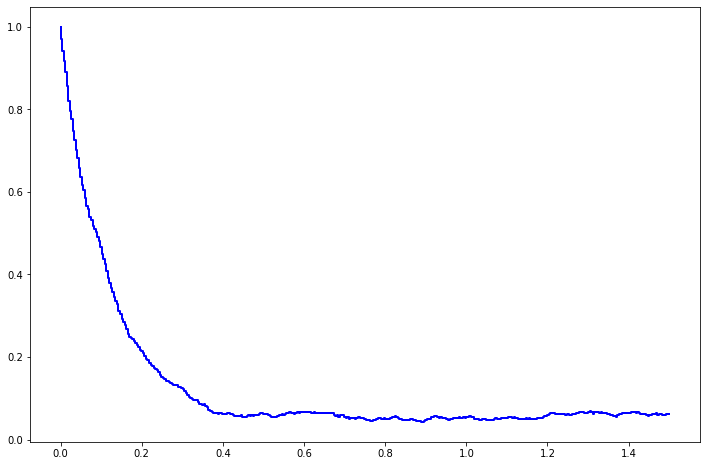

In [56]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,8))
axes.step(timelist, mc.expect[0], 'b', lw=2)

[ 0.94238578 -6.93847783]
comparing the gamma = 7.752 theoretical value with the simulation =  6.9384778325034295


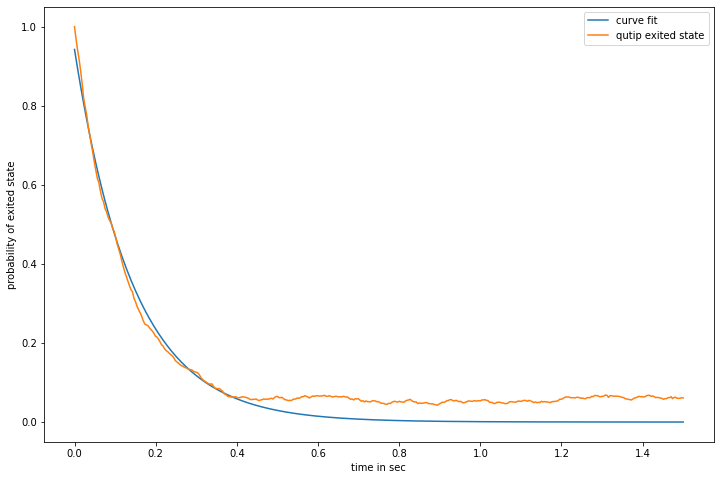

In [57]:
def test(x, a, b):
    '''
        give the array of  form  a*exp(b*x) for the given array x.
    '''
    return a * np.exp(b * x)


param, param_cov = curve_fit(test, timelist, mc.expect[0])
print(param)
fig = plt.figure(figsize=(12, 8))
plt.plot(timelist, param[0] * np.exp(param[1] * timelist), label="curve fit")
plt.plot(timelist, mc.expect[0], label="qutip exited state")
plt.xlabel("time in sec")
plt.ylabel("probability of exited state")
plt.legend()
print("comparing the gamma = 7.752 theoretical value with the simulation = ",-param[1])